# Sentiment Analysis 

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None

Accuracy: 0.57

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.95      0.10      0.19      7152
         0.0       0.92      0.32      0.47     11067
         1.0       0.51      0.99      0.67     14375

    accuracy                           0.57     32594
   macro avg       0.79      0.47      0.44     32594
weighted avg       0.75      0.57      0.50     32594



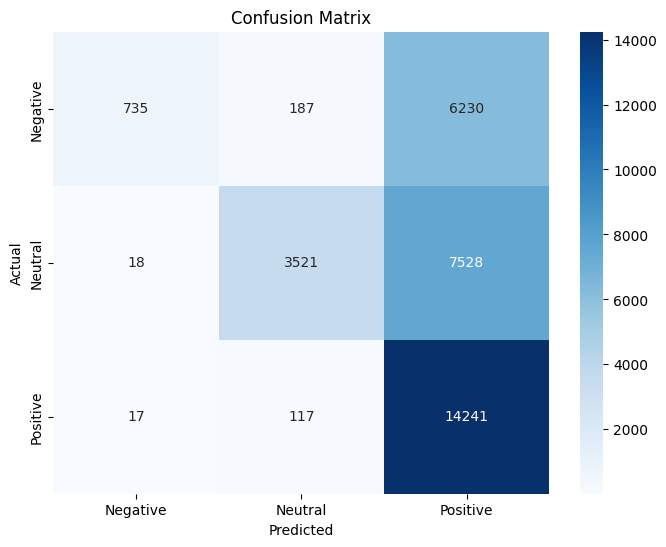

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from sklearn.pipeline import make_pipeline
import seaborn as sns

# Loading Twitter data CSV file into a pandas DataFrame
df = pd.read_csv("D:\Oasis-infobyte\Twitter_Data.csv")

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

df = df.dropna(subset=['clean_text','category'])


# Assuming your dataset has 'text' column containing tweet text and 'label' column with sentiment labels

# Perform sentiment analysis using Naive Bayes classifier
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['category'], test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF vectorizer and Naive Bayes classifier
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.0


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\spagr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\spagr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


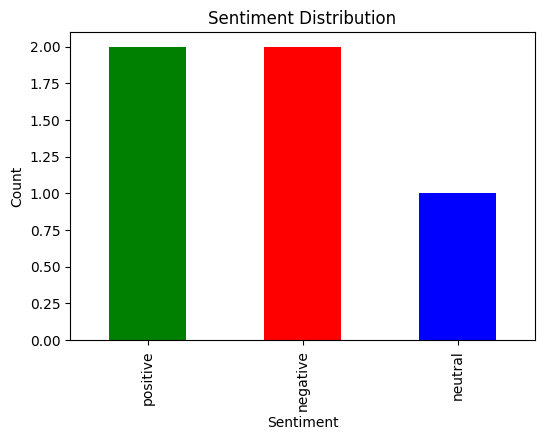

In [18]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Sample Twitter data (replace this with your actual dataset)
data = {'text': ['I love this product!', 'Not happy with the service.', 'Neutral tweet.',
                 'Awesome experience!', 'Disappointed with the quality.'],
        'sentiment': ['positive', 'negative', 'neutral', 'positive', 'negative']}

df = pd.DataFrame(data)

# Preprocess text data
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(words)

df['text'] = df['text'].apply(preprocess_text)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

# Feature extraction using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a simple Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

# Predict sentiments on the test set
predictions = classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


# Visualize sentiment distribution
plt.figure(figsize=(6, 4))
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

1.Text data is preprocessed by removing stop words, converting to lowercase, and tokenizing.

2.The dataset is split into training and testing sets.

3.The CountVectorizer is used for feature extraction.

4.A Naive Bayes classifier is trained on the training set.

5.Predictions are made on the test set, and the model's performance is evaluated.

6.A bar chart is created to visualize the distribution of sentiments in the dataset.